In [4]:
# prompt: can u remove any outliers in the dataser,

import pandas as pd

# Load the dataset
# Load the dataset
file_path = '/content/drive/MyDrive/No Useless Data - Test 2/No useless Data Test 2 - Dataset - Sensors Readings All - Copy.xlsx'  # Update with your file path
df = pd.read_excel(file_path)


# Remove outliers using z-score
z_scores = (df - df.mean()) / df.std()
df_filtered = df[(z_scores < 3).all(axis=1)]

# Print the filtered data
print(df_filtered)

      Box Temp Arduino (C)  Box Temp (C)  Ambient Temperature (C)  \
0                26.073502     43.610426                34.571591   
1                25.869790     42.999659                33.547225   
2                25.767935     43.203248                34.639882   
3                25.258656     42.897864                36.688615   
4                24.953088     42.694275                36.688615   
...                    ...           ...                      ...   
6097             24.647521     45.849905                46.249366   
6098             25.258656     46.664261                50.893160   
6099             26.277213     47.885795                48.502972   
6100             26.786492     48.292974                47.137150   
6101             26.888348     49.107330                51.098033   

      Humidity (%)  Wind (m/s)  Dust (mg/m^3)  Irradiance (W/m2)  \
0        28.097105    1.625331       0.000000          26.260890   
1        30.329802    0.121963     

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate features and target
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Train different classifiers
classifiers = {
    "Ridge Regression": Ridge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "ANN Model": MLPRegressor(max_iter=1000),
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    y_pred = classifier.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} accuracy: {score}")
    print(f"{name} MSE: {mse}")
    print(f" ")


Ridge Regression accuracy: 0.9406643201729254
Ridge Regression MSE: 0.251565186873207
 
SVR accuracy: 0.9365754213315132
SVR MSE: 0.26890087096991416
 
Decision Tree Regression accuracy: 0.9759899281675541
Decision Tree Regression MSE: 0.10179538222147934
 
Random Forest Regression accuracy: 0.9751281151297168
Random Forest Regression MSE: 0.10544920667491374
 
Linear Regression accuracy: 0.9406928426808816
Linear Regression MSE: 0.2514442601379781
 
XGBoost accuracy: 0.9650351941966256
XGBoost MSE: 0.1482401133946007
 
Gradient Boosting accuracy: 0.9681443098648433
Gradient Boosting MSE: 0.13505841114790806
 
Extra Trees Regressor accuracy: 0.9743766910963418
Extra Trees Regressor MSE: 0.10863501541474582
 
ANN Model accuracy: 0.8889439930298129
ANN Model MSE: 0.47084360081940824
 


For Classfications - Models

In [12]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Separate features and target
X = df_filtered.iloc[:, :-1]  # Features
# Convert target to integers for classification
y = df_filtered.iloc[:, -1].astype(int)   # Target (classification labels - e.g. Stable/Unstable)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Define different classifiers with pipelines (including scaling where needed)
classifiers = {
    "Ridge Classifier": make_pipeline(StandardScaler(), RidgeClassifier()),
    "SVC": make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0)),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=10),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "XGBoost Classifier": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42),
    "ANN Classifier": make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)),
}

# Train models and evaluate performance
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate metrics for multi-class classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")
    print(f"{name} F1 Score: {f1}")
    print(f"Classification Report for {name}:\n")
    # Get unique class labels from y_test
    unique_labels = sorted(y_test.unique())
    print(classification_report(y_test, y_pred, target_names=[str(label) for label in unique_labels]))  # Dynamically generate target_names
    print(f" ")

# Optional: Cross-validation for better assessment (you can add this for each model)
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')  # Example: using accuracy for cross-validation
    print(f"{name} Cross-Validation Accuracy: {scores.mean()} ± {scores.std()}")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Ridge Classifier Accuracy: 0.6859504132231405
Ridge Classifier Precision: 0.5273213417598445
Ridge Classifier Recall: 0.6859504132231405
Ridge Classifier F1 Score: 0.5882120634186749
Classification Report for Ridge Classifier:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        71
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        15
           5       0.38      1.00      0.55        12
           6       0.00      0.00      0.00         1

    accuracy                           0.69       121
   macro avg       0.17      0.29      0.21       121
weighted avg       0.53      0.69      0.59       121

 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

SVC Accuracy: 0.8429752066115702
SVC Precision: 0.7757670982642214
SVC Recall: 0.8429752066115702
SVC F1 Score: 0.8071589798276015
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       0.00      0.00      0.00         8
           2       0.50      0.33      0.40         3
           3       0.82      0.82      0.82        11
           4       0.75      0.80      0.77        15
           5       0.69      0.75      0.72        12
           6       0.00      0.00      0.00         1

    accuracy                           0.84       121
   macro avg       0.52      0.53      0.52       121
weighted avg       0.78      0.84      0.81       121

 
Decision Tree Classifier Accuracy: 0.8347107438016529
Decision Tree Classifier Precision: 0.8390321533862204
Decision Tree Classifier Recall: 0.8347107438016529
Decision Tree Classifier F1 Score: 0.8324151622158428
Classification Report f

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Classifier Accuracy: 0.9008264462809917
Random Forest Classifier Precision: 0.9043614139870825
Random Forest Classifier Recall: 0.9008264462809917
Random Forest Classifier F1 Score: 0.9009299613990136
Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.86      0.75      0.80         8
           2       0.40      0.67      0.50         3
           3       0.90      0.82      0.86        11
           4       0.76      0.87      0.81        15
           5       0.75      0.75      0.75        12
           6       0.00      0.00      0.00         1

    accuracy                           0.90       121
   macro avg       0.67      0.69      0.67       121
weighted avg       0.90      0.90      0.90       121

 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Logistic Regression Accuracy: 0.8760330578512396
Logistic Regression Precision: 0.8780645703348668
Logistic Regression Recall: 0.8760330578512396
Logistic Regression F1 Score: 0.8599100960464597
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.25      0.40         8
           2       0.67      0.67      0.67         3
           3       1.00      0.82      0.90        11
           4       0.76      0.87      0.81        15
           5       0.69      0.75      0.72        12
           6       0.00      0.00      0.00         1

    accuracy                           0.88       121
   macro avg       0.72      0.62      0.64       121
weighted avg       0.88      0.88      0.86       121

 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

XGBoost Classifier Accuracy: 0.8925619834710744
XGBoost Classifier Precision: 0.8896947971814283
XGBoost Classifier Recall: 0.8925619834710744
XGBoost Classifier F1 Score: 0.8902361275088548
Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.86      0.75      0.80         8
           2       0.67      0.67      0.67         3
           3       0.90      0.82      0.86        11
           4       0.71      0.80      0.75        15
           5       0.69      0.75      0.72        12
           6       0.00      0.00      0.00         1

    accuracy                           0.89       121
   macro avg       0.69      0.68      0.68       121
weighted avg       0.89      0.89      0.89       121

 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Gradient Boosting Classifier Accuracy: 0.8842975206611571
Gradient Boosting Classifier Precision: 0.8869781733418098
Gradient Boosting Classifier Recall: 0.8842975206611571
Gradient Boosting Classifier F1 Score: 0.8834360361046577
Classification Report for Gradient Boosting Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.83      0.62      0.71         8
           2       0.40      0.67      0.50         3
           3       0.90      0.82      0.86        11
           4       0.75      0.80      0.77        15
           5       0.69      0.75      0.72        12
           6       0.00      0.00      0.00         1

    accuracy                           0.88       121
   macro avg       0.65      0.66      0.65       121
weighted avg       0.89      0.88      0.88       121

 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Extra Trees Classifier Accuracy: 0.8760330578512396
Extra Trees Classifier Precision: 0.8767394221939677
Extra Trees Classifier Recall: 0.8760330578512396
Extra Trees Classifier F1 Score: 0.8728515792392093
Classification Report for Extra Trees Classifier:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.80      0.50      0.62         8
           2       0.40      0.67      0.50         3
           3       0.90      0.82      0.86        11
           4       0.75      0.80      0.77        15
           5       0.69      0.75      0.72        12
           6       0.00      0.00      0.00         1

    accuracy                           0.88       121
   macro avg       0.64      0.65      0.64       121
weighted avg       0.88      0.88      0.87       121

 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

ANN Classifier Accuracy: 0.9090909090909091
ANN Classifier Precision: 0.9037437310164583
ANN Classifier Recall: 0.9090909090909091
ANN Classifier F1 Score: 0.9059240225015628
Classification Report for ANN Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.78      0.88      0.82         8
           2       0.67      0.67      0.67         3
           3       0.90      0.82      0.86        11
           4       0.80      0.80      0.80        15
           5       0.77      0.83      0.80        12
           6       0.00      0.00      0.00         1

    accuracy                           0.91       121
   macro avg       0.70      0.71      0.70       121
weighted avg       0.90      0.91      0.91       121

 
Ridge Classifier Cross-Validation Accuracy: 0.6840321639897977 ± 0.012477839872826298
SVC Cross-Validation Accuracy: 0.7849132932761245 ± 0.019344674335977464
Decision Tree Classifier

usage: colab_kernel_launcher.py [-h] --data DATA [--output OUTPUT]
colab_kernel_launcher.py: error: the following arguments are required: --data


INCREMENTAL META-LEARNING FOR PV DATASET
Preprocessing dataset...

Target variable summary:
Mean: 1.8014
Std dev: 2.3091
Min: 0.0000
Max: 23.4069
Dataset preprocessing complete.

Evaluating traditional models for baseline comparison...
Training Ridge Regression...
  Ridge Regression - R²: 0.7072, MSE: 1.5610
Training SVR...
  SVR - R²: 0.7185, MSE: 1.5008
Training Decision Tree...
  Decision Tree - R²: 1.0000, MSE: 0.0000
Training Random Forest...
  Random Forest - R²: 0.9610, MSE: 0.2080
Training Linear Regression...
  Linear Regression - R²: 0.7072, MSE: 1.5610
Training XGBoost...
  XGBoost - R²: 0.9945, MSE: 0.0292
Training Gradient Boosting...
  Gradient Boosting - R²: 0.8423, MSE: 0.8409
Training Extra Trees...
  Extra Trees - R²: 1.0000, MSE: 0.0000
Training Neural Network...
  Neural Network - R²: 0.7647, MSE: 1.2542

Running incremental learning with 5 increments...
Increment 1/5:
  Data points processed: 976
  R² score: 0.3729
  MSE: 3.4208
  Model weights: RF=0.30, XGB=0.35, 

TypeError: string indices must be integers, not 'str'

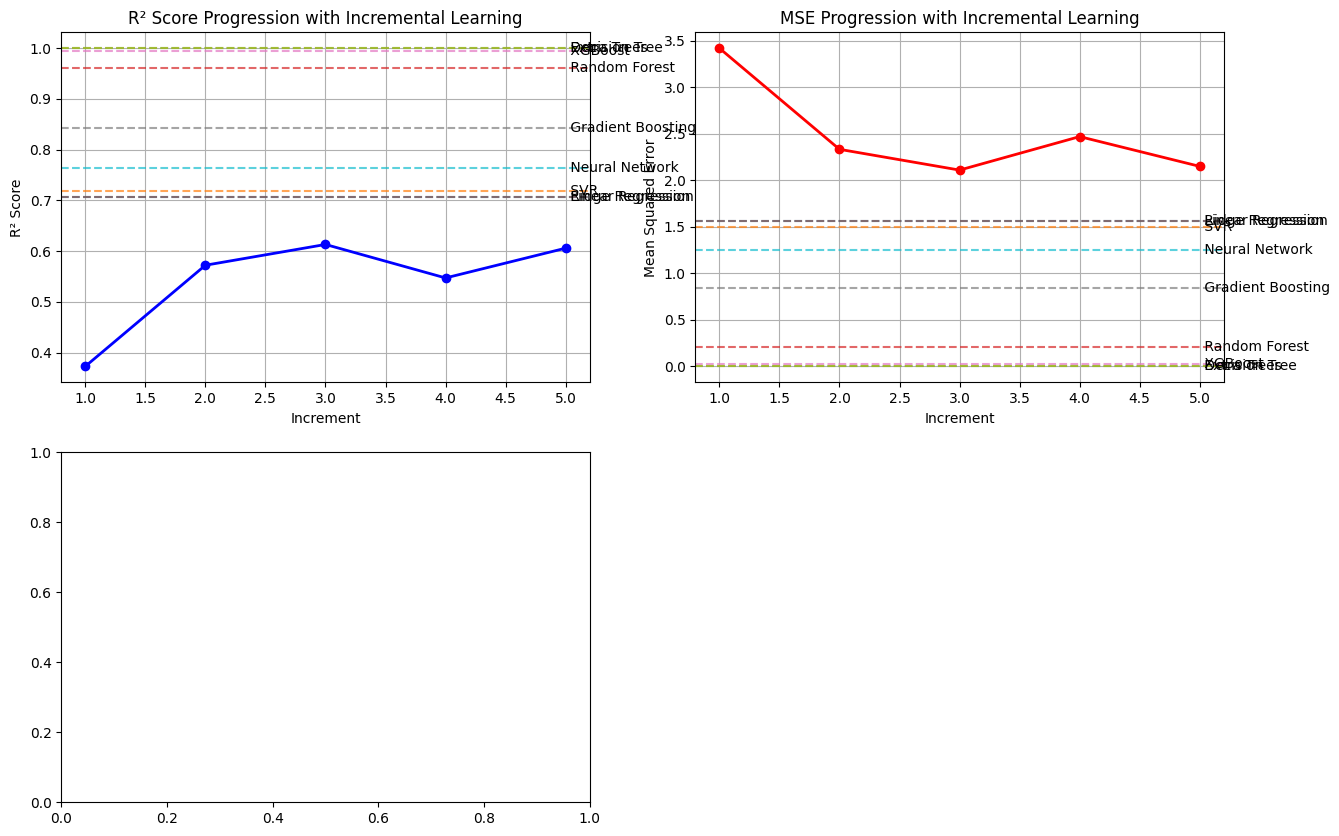

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Incremental Meta-Regressor implementation
class IncrementalMetaRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.1, memory_size=1000):
        self.learning_rate = learning_rate
        self.memory_size = memory_size

        # Initialize base models - using tree-based models as per paper specification
        self.models = {
            'rf': RandomForestRegressor(n_estimators=100, random_state=42),
            'xgb': XGBRegressor(random_state=42),
            'dt': DecisionTreeRegressor(random_state=42)
        }

        # Initialize meta-model (XGBoost as meta-regressor)
        self.meta_model = XGBRegressor(random_state=42)

        # Initialize meta-model weights
        self.meta_weights = np.ones(len(self.models)) / len(self.models)

        # Initialize memory buffer for storing recent samples
        self.memory_X = None
        self.memory_y = None

        # Flag to check if meta-model has been fitted
        self.meta_model_fitted = False

        # For tracking performance over time
        self.performance_history = []

    def _update_memory(self, X, y):
        """Update memory buffer with new samples"""
        if self.memory_X is None:
            self.memory_X = X[:self.memory_size]
            self.memory_y = y[:self.memory_size]
        else:
            # Combine old and new samples
            X_combined = np.vstack((self.memory_X, X))
            y_combined = np.concatenate((self.memory_y, y))

            # If combined size exceeds memory_size, randomly sample
            if len(X_combined) > self.memory_size:
                indices = np.random.choice(len(X_combined),
                                        self.memory_size,
                                        replace=False)
                self.memory_X = X_combined[indices]
                self.memory_y = y_combined[indices]
            else:
                self.memory_X = X_combined
                self.memory_y = y_combined

    def _update_meta_weights(self, X, y):
        """Update meta-model weights based on performance"""
        performances = []

        # Calculate performance (R² score) for each model
        for model in self.models.values():
            pred = model.predict(X)
            r2 = r2_score(y, pred)
            performances.append(max(0.0001, r2))  # Ensure no negative values for softmax

        # Convert to numpy array
        performances = np.array(performances)

        # Update weights using softmax
        weighted_perf = performances * self.meta_weights
        exp_perf = np.exp(weighted_perf / self.learning_rate)
        self.meta_weights = exp_perf / exp_perf.sum()

        return performances

    def _get_meta_features(self, X):
        """Generate meta-features (predictions from base models)"""
        meta_features = np.column_stack([
            model.predict(X) for model in self.models.values()
        ])
        return meta_features

    def partial_fit(self, X, y):
        """Incrementally fit the model on new data"""
        # Update memory buffer
        self._update_memory(X, y)

        # Train base models on combined data
        for model in self.models.values():
            model.fit(self.memory_X, self.memory_y)

        # Generate meta-features for training meta-model
        meta_features = self._get_meta_features(self.memory_X)

        # Train meta-model
        self.meta_model.fit(meta_features, self.memory_y)
        self.meta_model_fitted = True

        # Update meta-weights
        performances = self._update_meta_weights(X, y)

        return performances

    def predict(self, X):
        """Predict using either meta-model or weighted ensemble"""
        if not self.meta_model_fitted:
            # If meta-model not fitted yet, use weighted ensemble
            predictions = []
            for model in self.models.values():
                pred = model.predict(X)
                predictions.append(pred)

            # Weight predictions using meta-weights
            weighted_pred = np.zeros_like(predictions[0])
            for weight, pred in zip(self.meta_weights, predictions):
                weighted_pred += weight * pred

            return weighted_pred
        else:
            # Generate meta-features
            meta_features = self._get_meta_features(X)

            # Use meta-model for prediction
            return self.meta_model.predict(meta_features)

    def score(self, X, y):
        """Return R² score on given test data"""
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Load dataset function
def load_dataset(filepath):
    """Load dataset from file and perform initial preprocessing"""
    print(f"Loading dataset from {filepath}...")

    # Load the dataset
    try:
        df = pd.read_csv(filepath)
        print(f"Successfully loaded dataset with shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")

        # Display basic info
        print("\nDataset Overview:")
        print(f"Number of samples: {df.shape[0]}")
        print(f"Number of features: {df.shape[1]-1}")  # Assuming last column is target
        print(f"Missing values: {df.isnull().sum().sum()}")

        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise

# Preprocess dataset function
def preprocess_dataset(df):
    """Preprocess dataset for modeling"""
    print("Preprocessing dataset...")

    # Check for missing values
    if df.isnull().sum().sum() > 0:
        print(f"Filling {df.isnull().sum().sum()} missing values...")
        df = df.fillna(df.mean())

    # Assuming last column is target variable
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Display target distribution
    print(f"\nTarget variable summary:")
    print(f"Mean: {y.mean():.4f}")
    print(f"Std dev: {y.std():.4f}")
    print(f"Min: {y.min():.4f}")
    print(f"Max: {y.max():.4f}")

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    print("Dataset preprocessing complete.")
    return X_scaled_df, y

# Compare traditional models
def evaluate_traditional_models(X_train, X_test, y_train, y_test):
    """Evaluate traditional models for baseline comparison"""
    print("\nEvaluating traditional models for baseline comparison...")

    # Define models to evaluate
    models = {
        "Ridge Regression": Ridge(),
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Linear Regression": LinearRegression(),
        "XGBoost": XGBRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Extra Trees": ExtraTreesRegressor(),
        "Neural Network": MLPRegressor(max_iter=1000),
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {'r2': r2, 'mse': mse}

        print(f"  {name} - R²: {r2:.4f}, MSE: {mse:.4f}")

    return results

# Run incremental learning
def run_incremental_learning(X, y, n_increments=5, test_size=0.2):
    """Run incremental learning experiment"""
    print(f"\nRunning incremental learning with {n_increments} increments...")

    # Initial train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create meta-learner
    meta_learner = IncrementalMetaRegressor(memory_size=2000)

    # Split training data into increments
    increment_size = len(X_train) // n_increments
    results = []

    # Convert to NumPy arrays before iteration for consistency
    X_train_values = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    y_train_values = y_train.values if isinstance(y_train, pd.Series) else y_train
    X_test_values = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
    y_test_values = y_test.values if isinstance(y_test, pd.Series) else y_test

    # Simulate incremental learning
    for i in range(n_increments):
        # Get current increment
        start_idx = i * increment_size
        end_idx = start_idx + increment_size if i < n_increments - 1 else len(X_train_values)

        X_increment = X_train_values[start_idx:end_idx]
        y_increment = y_train_values[start_idx:end_idx]

        # Feed increment to meta-learner
        performances = meta_learner.partial_fit(X_increment, y_increment)

        # Evaluate on test set
        y_pred = meta_learner.predict(X_test_values)
        r2 = r2_score(y_test_values, y_pred)
        mse = mean_squared_error(y_test_values, y_pred)

        # Ensure model_weights is a list before appending to results
        model_weights = meta_learner.meta_weights.tolist() if isinstance(meta_learner.meta_weights, np.ndarray) else meta_learner.meta_weights

        # Store results
        results.append({
            'increment': i+1,
            'r2_score': r2,
            'mse': mse,
            'model_weights': model_weights,  # Use the converted model_weights
            'base_model_performances': performances
        })

        print(f"Increment {i+1}/{n_increments}:")
        print(f"  Data points processed: {end_idx}")
        print(f"  R² score: {r2:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  Model weights: RF={meta_learner.meta_weights[0]:.2f}, " +
              f"XGB={meta_learner.meta_weights[1]:.2f}, " +
              f"DT={meta_learner.meta_weights[2]:.2f}")

    return meta_learner, results

# Analyze and visualize results
def analyze_results(results, baseline_results=None):
    """Analyze and visualize the results of incremental learning"""
    print("\nAnalyzing incremental learning results...")

    # Extract metrics
    increments = [r['increment'] for r in results]
    r2_scores = [r['r2_score'] for r in results]
    mse_values = [r['mse'] for r in results]

    # Create figure
    plt.figure(figsize=(15, 10))

    # Plot R² progression
    plt.subplot(2, 2, 1)
    plt.plot(increments, r2_scores, 'o-', linewidth=2, color='blue')
    plt.xlabel('Increment')
    plt.ylabel('R² Score')
    plt.title('R² Score Progression with Incremental Learning')
    plt.grid(True)

    # Add horizontal lines for baseline models if available
    if baseline_results:
        colors = plt.cm.tab10(np.linspace(0, 1, len(baseline_results)))
        for i, (model_name, results) in enumerate(baseline_results.items()):
            plt.axhline(y=results['r2'], color=colors[i], linestyle='--', alpha=0.7)
            plt.text(max(increments), results['r2'], f" {model_name}", verticalalignment='center')

    # Plot MSE progression
    plt.subplot(2, 2, 2)
    plt.plot(increments, mse_values, 'o-', linewidth=2, color='red')
    plt.xlabel('Increment')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE Progression with Incremental Learning')
    plt.grid(True)

    # Add horizontal lines for baseline models if available
    if baseline_results:
        for i, (model_name, results) in enumerate(baseline_results.items()):
            plt.axhline(y=results['mse'], color=colors[i], linestyle='--', alpha=0.7)
            plt.text(max(increments), results['mse'], f" {model_name}", verticalalignment='center')

    # Plot model weight evolution
    plt.subplot(2, 2, 3)
    rf_weights = [r['model_weights'][0] for r in results]
    xgb_weights = [r['model_weights'][1] for r in results]
    dt_weights = [r['model_weights'][2] for r in results]

    plt.plot(increments, rf_weights, 'o-', label='Random Forest')
    plt.plot(increments, xgb_weights, 's-', label='XGBoost')
    plt.plot(increments, dt_weights, '^-', label='Decision Tree')
    plt.xlabel('Increment')
    plt.ylabel('Model Weight')
    plt.title('Evolution of Model Weights During Incremental Learning')
    plt.legend()
    plt.grid(True)

    # Plot performance improvement percentage
    plt.subplot(2, 2, 4)
    initial_r2 = r2_scores[0]
    improvement = [(r2 - initial_r2) / max(0.0001, abs(initial_r2)) * 100 for r2 in r2_scores]

    plt.bar(increments, improvement, color='green', alpha=0.7)
    plt.xlabel('Increment')
    plt.ylabel('R² Improvement (%)')
    plt.title('Percentage Improvement in R² Score')
    plt.grid(True, axis='y')

    plt.tight_layout()
    plt.savefig('incremental_learning_results.png', dpi=300)
    plt.show()

    print("\nResults Summary:")
    print(f"Initial R² score: {r2_scores[0]:.4f}")
    print(f"Final R² score: {r2_scores[-1]:.4f}")
    print(f"Improvement: {r2_scores[-1] - r2_scores[0]:.4f} ({improvement[-1]:.1f}%)")
    print(f"Initial MSE: {mse_values[0]:.4f}")
    print(f"Final MSE: {mse_values[-1]:.4f}")

    # Return the final model weights
    return {
        'Random Forest': rf_weights[-1],
        'XGBoost': xgb_weights[-1],
        'Decision Tree': dt_weights[-1]
    }

# Save model and results
def save_results(meta_learner, results, final_weights, output_dir='./'):
    """Save model and results to files"""
    import pickle
    import os
    import datetime

    # Create timestamp for filenames
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

    # Ensure directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save model
    model_path = os.path.join(output_dir, f"meta_model_{timestamp}.pkl")
    with open(model_path, 'wb') as f:
        pickle.dump(meta_learner, f)

    # Save results as CSV
    results_df = pd.DataFrame([{
        'Increment': r['increment'],
        'R2_Score': r['r2_score'],
        'MSE': r['mse'],
        'RF_Weight': r['model_weights'][0],
        'XGB_Weight': r['model_weights'][1],
        'DT_Weight': r['model_weights'][2]
    } for r in results])

    results_path = os.path.join(output_dir, f"results_{timestamp}.csv")
    results_df.to_csv(results_path, index=False)

    print(f"\nModel saved to: {model_path}")
    print(f"Results saved to: {results_path}")

    # Generate a summary text file
    summary_path = os.path.join(output_dir, f"summary_{timestamp}.txt")
    with open(summary_path, 'w') as f:
        f.write("Incremental Meta-Learning Results Summary\n")
        f.write("=======================================\n\n")
        f.write(f"Date: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

        f.write("Final Model Weights:\n")
        for model, weight in final_weights.items():
            f.write(f"  {model}: {weight:.4f}\n")

        f.write("\nPerformance Progression:\n")
        for r in results:
            f.write(f"  Increment {r['increment']}: R² = {r['r2_score']:.4f}, MSE = {r['mse']:.4f}\n")

        f.write(f"\nFinal R² Improvement: {results[-1]['r2_score'] - results[0]['r2_score']:.4f}\n")

    print(f"Summary saved to: {summary_path}")

# Main execution function
def main(data_path, output_dir='./output'):
    """Main execution function"""
    print("=" * 60)
    print("INCREMENTAL META-LEARNING FOR PV DATASET")
    print("=" * 60)

    # Load dataset
    file_path = '/content/drive/MyDrive/No Useless Data - Test 2/No useless Data Test 2 - Dataset - Sensors Readings All - Copy.xlsx'  # Update with your file path
    df = pd.read_excel(file_path)

    # Preprocess dataset
    X, y = preprocess_dataset(df)

    # Evaluate traditional models
    baseline_results = evaluate_traditional_models(X, X, y, y)

    # Run incremental learning
    meta_learner, results = run_incremental_learning(X, y, n_increments=5)

    # Analyze results
    final_weights = analyze_results(results, baseline_results)

    # Save results
    save_results(meta_learner, results, final_weights, output_dir)

    print("\nExecution completed successfully!")

# If script is run directly
if __name__ == "__main__":
    import argparse

    # Set up command line argument parsing
    parser = argparse.ArgumentParser(description='Run incremental meta-learning on PV dataset')
    parser.add_argument('--data', type=str, required=True, help='Path to input dataset CSV file')
    parser.add_argument('--output', type=str, default='./output', help='Directory to save outputs')

    # Check if arguments are provided (for running in Jupyter Notebook)
    try:
        args = parser.parse_args()
    except SystemExit:
        # If no arguments are provided, set them manually
        args = argparse.Namespace(data=file_path, output='./output')

    # Run main function
    main(args.data, args.output)

usage: colab_kernel_launcher.py [-h] --data DATA [--output OUTPUT]
colab_kernel_launcher.py: error: the following arguments are required: --data


INCREMENTAL META-LEARNING FOR PV DATASET
Preprocessing dataset...

Target variable summary:
Mean: 1.8014
Std dev: 2.3091
Min: 0.0000
Max: 23.4069
Dataset preprocessing complete.

Evaluating traditional models for baseline comparison...
Training Ridge Regression...
  Ridge Regression - R²: 0.7072, MSE: 1.5610
Training SVR...
  SVR - R²: 0.7185, MSE: 1.5008
Training Decision Tree...
  Decision Tree - R²: 1.0000, MSE: 0.0000
Training Random Forest...
  Random Forest - R²: 0.9588, MSE: 0.2199
Training Linear Regression...
  Linear Regression - R²: 0.7072, MSE: 1.5610
Training XGBoost...
  XGBoost - R²: 0.9945, MSE: 0.0292
Training Gradient Boosting...
  Gradient Boosting - R²: 0.8423, MSE: 0.8409
Training Extra Trees...
  Extra Trees - R²: 1.0000, MSE: 0.0000
Training Neural Network...
  Neural Network - R²: 0.7659, MSE: 1.2478

Running incremental learning with 35 increments...
Increment 1/35:
  Data points processed: 139
  R² score: 0.6759
  MSE: 1.7677
  Model weights: RF=0.26, XGB=0.37

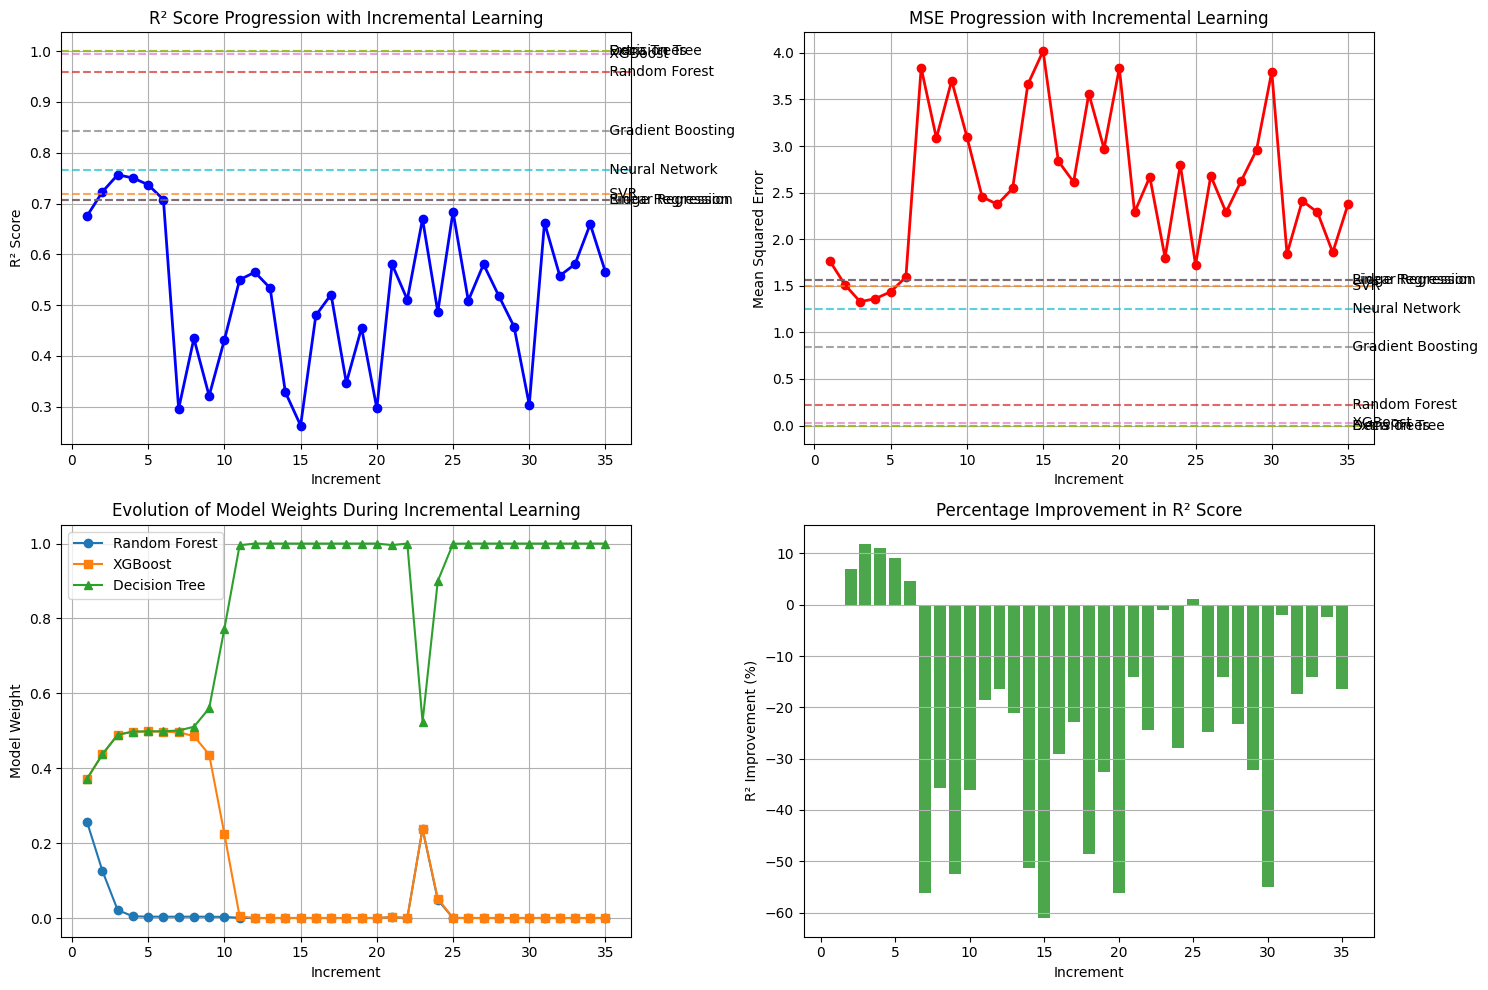


Results Summary:
Initial R² score: 0.6759
Final R² score: 0.5650
Improvement: -0.1110 (-16.4%)
Initial MSE: 1.7677
Final MSE: 2.3730

Model saved to: ./output/meta_model_20250228_204204.pkl
Results saved to: ./output/results_20250228_204204.csv
Summary saved to: ./output/summary_20250228_204204.txt

Execution completed successfully!


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Incremental Meta-Regressor implementation
class IncrementalMetaRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.1, memory_size=1000):
        self.learning_rate = learning_rate
        self.memory_size = memory_size

        # Initialize base models - using tree-based models as per paper specification
        self.models = {
            'rf': RandomForestRegressor(n_estimators=100, random_state=42),
            'xgb': XGBRegressor(random_state=42),
            'dt': DecisionTreeRegressor(random_state=42)
        }

        # Initialize meta-model (XGBoost as meta-regressor)
        self.meta_model = XGBRegressor(random_state=42)

        # Initialize meta-model weights
        self.meta_weights = np.ones(len(self.models)) / len(self.models)

        # Initialize memory buffer for storing recent samples
        self.memory_X = None
        self.memory_y = None

        # Flag to check if meta-model has been fitted
        self.meta_model_fitted = False

        # For tracking performance over time
        self.performance_history = []

    def _update_memory(self, X, y):
        """Update memory buffer with new samples"""
        if self.memory_X is None:
            self.memory_X = X[:self.memory_size]
            self.memory_y = y[:self.memory_size]
        else:
            # Combine old and new samples
            X_combined = np.vstack((self.memory_X, X))
            y_combined = np.concatenate((self.memory_y, y))

            # If combined size exceeds memory_size, randomly sample
            if len(X_combined) > self.memory_size:
                indices = np.random.choice(len(X_combined),
                                        self.memory_size,
                                        replace=False)
                self.memory_X = X_combined[indices]
                self.memory_y = y_combined[indices]
            else:
                self.memory_X = X_combined
                self.memory_y = y_combined

    def _update_meta_weights(self, X, y):
        """Update meta-model weights based on performance"""
        performances = []

        # Calculate performance (R² score) for each model
        for model in self.models.values():
            pred = model.predict(X)
            r2 = r2_score(y, pred)
            performances.append(max(0.0001, r2))  # Ensure no negative values for softmax

        # Convert to numpy array
        performances = np.array(performances)

        # Update weights using softmax
        weighted_perf = performances * self.meta_weights
        exp_perf = np.exp(weighted_perf / self.learning_rate)
        self.meta_weights = exp_perf / exp_perf.sum()

        return performances

    def _get_meta_features(self, X):
        """Generate meta-features (predictions from base models)"""
        meta_features = np.column_stack([
            model.predict(X) for model in self.models.values()
        ])
        return meta_features

    def partial_fit(self, X, y):
        """Incrementally fit the model on new data"""
        # Update memory buffer
        self._update_memory(X, y)

        # Train base models on combined data
        for model in self.models.values():
            model.fit(self.memory_X, self.memory_y)

        # Generate meta-features for training meta-model
        meta_features = self._get_meta_features(self.memory_X)

        # Train meta-model
        self.meta_model.fit(meta_features, self.memory_y)
        self.meta_model_fitted = True

        # Update meta-weights
        performances = self._update_meta_weights(X, y)

        return performances

    def predict(self, X):
        """Predict using either meta-model or weighted ensemble"""
        if not self.meta_model_fitted:
            # If meta-model not fitted yet, use weighted ensemble
            predictions = []
            for model in self.models.values():
                pred = model.predict(X)
                predictions.append(pred)

            # Weight predictions using meta-weights
            weighted_pred = np.zeros_like(predictions[0])
            for weight, pred in zip(self.meta_weights, predictions):
                weighted_pred += weight * pred

            return weighted_pred
        else:
            # Generate meta-features
            meta_features = self._get_meta_features(X)

            # Use meta-model for prediction
            return self.meta_model.predict(meta_features)

    def score(self, X, y):
        """Return R² score on given test data"""
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Load dataset function
def load_dataset(filepath):
    """Load dataset from file and perform initial preprocessing"""
    print(f"Loading dataset from {filepath}...")

    # Load the dataset
    try:
        df = pd.read_csv(filepath)
        print(f"Successfully loaded dataset with shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")

        # Display basic info
        print("\nDataset Overview:")
        print(f"Number of samples: {df.shape[0]}")
        print(f"Number of features: {df.shape[1]-1}")  # Assuming last column is target
        print(f"Missing values: {df.isnull().sum().sum()}")

        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise

# Preprocess dataset function
def preprocess_dataset(df):
    """Preprocess dataset for modeling"""
    print("Preprocessing dataset...")

    # Check for missing values
    if df.isnull().sum().sum() > 0:
        print(f"Filling {df.isnull().sum().sum()} missing values...")
        df = df.fillna(df.mean())

    # Assuming last column is target variable
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Display target distribution
    print(f"\nTarget variable summary:")
    print(f"Mean: {y.mean():.4f}")
    print(f"Std dev: {y.std():.4f}")
    print(f"Min: {y.min():.4f}")
    print(f"Max: {y.max():.4f}")

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    print("Dataset preprocessing complete.")
    return X_scaled_df, y

# Compare traditional models
def evaluate_traditional_models(X_train, X_test, y_train, y_test):
    """Evaluate traditional models for baseline comparison"""
    print("\nEvaluating traditional models for baseline comparison...")

    # Define models to evaluate
    models = {
        "Ridge Regression": Ridge(),
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Linear Regression": LinearRegression(),
        "XGBoost": XGBRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Extra Trees": ExtraTreesRegressor(),
        "Neural Network": MLPRegressor(max_iter=1000),
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {'r2': r2, 'mse': mse}

        print(f"  {name} - R²: {r2:.4f}, MSE: {mse:.4f}")

    return results

# Run incremental learning
def run_incremental_learning(X, y, n_increments=5, test_size=0.2):
    """Run incremental learning experiment"""
    print(f"\nRunning incremental learning with {n_increments} increments...")

    # Initial train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create meta-learner
    meta_learner = IncrementalMetaRegressor(memory_size=2000)

    # Split training data into increments
    increment_size = len(X_train) // n_increments
    results = []

    # Convert to numpy arrays if they're dataframes
    if isinstance(X_train, pd.DataFrame):
        X_train_values = X_train.values
    else:
        X_train_values = X_train

    if isinstance(y_train, pd.Series):
        y_train_values = y_train.values
    else:
        y_train_values = y_train

    if isinstance(X_test, pd.DataFrame):
        X_test_values = X_test.values
    else:
        X_test_values = X_test

    if isinstance(y_test, pd.Series):
        y_test_values = y_test.values
    else:
        y_test_values = y_test

    # Simulate incremental learning
    for i in range(n_increments):
        # Get current increment
        start_idx = i * increment_size
        end_idx = start_idx + increment_size if i < n_increments - 1 else len(X_train_values)

        X_increment = X_train_values[start_idx:end_idx]
        y_increment = y_train_values[start_idx:end_idx]

        # Feed increment to meta-learner
        performances = meta_learner.partial_fit(X_increment, y_increment)

        # Evaluate on test set
        y_pred = meta_learner.predict(X_test_values)
        r2 = r2_score(y_test_values, y_pred)
        mse = mean_squared_error(y_test_values, y_pred)

        # Store results
        results.append({
            'increment': i+1,
            'r2_score': r2,
            'mse': mse,
            'model_weights': meta_learner.meta_weights.tolist(),  # Convert numpy array to list
            'base_model_performances': performances.tolist()  # Convert numpy array to list
        })

        print(f"Increment {i+1}/{n_increments}:")
        print(f"  Data points processed: {end_idx}")
        print(f"  R² score: {r2:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  Model weights: RF={meta_learner.meta_weights[0]:.2f}, " +
              f"XGB={meta_learner.meta_weights[1]:.2f}, " +
              f"DT={meta_learner.meta_weights[2]:.2f}")

    return meta_learner, results

# Analyze and visualize results
def analyze_results(results, baseline_results=None):
    """Analyze and visualize the results of incremental learning"""
    print("\nAnalyzing incremental learning results...")

    # Extract metrics
    increments = [r['increment'] for r in results]
    r2_scores = [r['r2_score'] for r in results]
    mse_values = [r['mse'] for r in results]

    # Extract model weights (fixed from original code)
    rf_weights = [r['model_weights'][0] for r in results]
    xgb_weights = [r['model_weights'][1] for r in results]
    dt_weights = [r['model_weights'][2] for r in results]

    # Create figure
    plt.figure(figsize=(15, 10))

    # Plot R² progression
    plt.subplot(2, 2, 1)
    plt.plot(increments, r2_scores, 'o-', linewidth=2, color='blue')
    plt.xlabel('Increment')
    plt.ylabel('R² Score')
    plt.title('R² Score Progression with Incremental Learning')
    plt.grid(True)

    # Add horizontal lines for baseline models if available
    if baseline_results:
        colors = plt.cm.tab10(np.linspace(0, 1, len(baseline_results)))
        for i, (model_name, results) in enumerate(baseline_results.items()):
            plt.axhline(y=results['r2'], color=colors[i], linestyle='--', alpha=0.7)
            plt.text(max(increments), results['r2'], f" {model_name}", verticalalignment='center')

    # Plot MSE progression
    plt.subplot(2, 2, 2)
    plt.plot(increments, mse_values, 'o-', linewidth=2, color='red')
    plt.xlabel('Increment')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE Progression with Incremental Learning')
    plt.grid(True)

    # Add horizontal lines for baseline models if available
    if baseline_results:
        for i, (model_name, results) in enumerate(baseline_results.items()):
            plt.axhline(y=results['mse'], color=colors[i], linestyle='--', alpha=0.7)
            plt.text(max(increments), results['mse'], f" {model_name}", verticalalignment='center')

    # Plot model weight evolution
    plt.subplot(2, 2, 3)
    plt.plot(increments, rf_weights, 'o-', label='Random Forest')
    plt.plot(increments, xgb_weights, 's-', label='XGBoost')
    plt.plot(increments, dt_weights, '^-', label='Decision Tree')
    plt.xlabel('Increment')
    plt.ylabel('Model Weight')
    plt.title('Evolution of Model Weights During Incremental Learning')
    plt.legend()
    plt.grid(True)

    # Plot performance improvement percentage
    plt.subplot(2, 2, 4)
    initial_r2 = r2_scores[0]
    improvement = [(r2 - initial_r2) / max(0.0001, abs(initial_r2)) * 100 for r2 in r2_scores]

    plt.bar(increments, improvement, color='green', alpha=0.7)
    plt.xlabel('Increment')
    plt.ylabel('R² Improvement (%)')
    plt.title('Percentage Improvement in R² Score')
    plt.grid(True, axis='y')

    plt.tight_layout()
    plt.savefig('incremental_learning_results.png', dpi=300)
    plt.show()

    print("\nResults Summary:")
    print(f"Initial R² score: {r2_scores[0]:.4f}")
    print(f"Final R² score: {r2_scores[-1]:.4f}")
    print(f"Improvement: {r2_scores[-1] - r2_scores[0]:.4f} ({improvement[-1]:.1f}%)")
    print(f"Initial MSE: {mse_values[0]:.4f}")
    print(f"Final MSE: {mse_values[-1]:.4f}")

    # Return the final model weights
    return {
        'Random Forest': rf_weights[-1],
        'XGBoost': xgb_weights[-1],
        'Decision Tree': dt_weights[-1]
    }

# Save model and results
def save_results(meta_learner, results, final_weights, output_dir='./'):
    """Save model and results to files"""
    import pickle
    import os
    import datetime

    # Create timestamp for filenames
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

    # Ensure directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save model
    model_path = os.path.join(output_dir, f"meta_model_{timestamp}.pkl")
    with open(model_path, 'wb') as f:
        pickle.dump(meta_learner, f)

    # Save results as CSV
    results_df = pd.DataFrame([{
        'Increment': r['increment'],
        'R2_Score': r['r2_score'],
        'MSE': r['mse'],
        'RF_Weight': r['model_weights'][0],
        'XGB_Weight': r['model_weights'][1],
        'DT_Weight': r['model_weights'][2]
    } for r in results])

    results_path = os.path.join(output_dir, f"results_{timestamp}.csv")
    results_df.to_csv(results_path, index=False)

    print(f"\nModel saved to: {model_path}")
    print(f"Results saved to: {results_path}")

    # Generate a summary text file
    summary_path = os.path.join(output_dir, f"summary_{timestamp}.txt")
    with open(summary_path, 'w') as f:
        f.write("Incremental Meta-Learning Results Summary\n")
        f.write("=======================================\n\n")
        f.write(f"Date: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

        f.write("Final Model Weights:\n")
        for model, weight in final_weights.items():
            f.write(f"  {model}: {weight:.4f}\n")

        f.write("\nPerformance Progression:\n")
        for r in results:
            f.write(f"  Increment {r['increment']}: R² = {r['r2_score']:.4f}, MSE = {r['mse']:.4f}\n")

        f.write(f"\nFinal R² Improvement: {results[-1]['r2_score'] - results[0]['r2_score']:.4f}\n")

    print(f"Summary saved to: {summary_path}")

# Main execution function
def main(data_path, output_dir='./output'):
    """Main execution function"""
    print("=" * 60)
    print("INCREMENTAL META-LEARNING FOR PV DATASET")
    print("=" * 60)

    # Load dataset
    file_path = '/content/drive/MyDrive/No Useless Data - Test 2/No useless Data Test 2 - Dataset - Sensors Readings All - Copy.xlsx'  # Update with your file path
    df = pd.read_excel(file_path)

    # Preprocess dataset
    X, y = preprocess_dataset(df)

    # Evaluate traditional models
    baseline_results = evaluate_traditional_models(X, X, y, y)

    # Run incremental learning
    meta_learner, results = run_incremental_learning(X, y, n_increments=35)

    # Analyze results
    final_weights = analyze_results(results, baseline_results)

    # Save results
    save_results(meta_learner, results, final_weights, output_dir)

    print("\nExecution completed successfully!")

# If script is run directly
if __name__ == "__main__":
    import argparse

    # Set up command line argument parsing
    parser = argparse.ArgumentParser(description='Run incremental meta-learning on PV dataset')
    parser.add_argument('--data', type=str, required=True, help='Path to input dataset CSV file')
    parser.add_argument('--output', type=str, default='./output', help='Directory to save outputs')

    # Check if arguments are provided (for running in Jupyter Notebook)
    try:
        args = parser.parse_args()
    except SystemExit:
        # If no arguments are provided, set them manually
        args = argparse.Namespace(data=file_path, output='./output')

    # Run main function
    main(args.data, args.output)

For Incremental Learning

In [13]:
dir(ensemble)


NameError: name 'ensemble' is not defined

In [14]:
from river import tree, ensemble
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Separate features and target
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Batch size for incremental updates
batch_size = 32  # Can adjust this value

# SGDClassifier (incremental learning with linear models)
sgd_classifier = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))

# Incremental Decision Tree (Hoeffding Tree)
incremental_tree = tree.HoeffdingTreeClassifier()

# Advanced Incremental Model (Leveraging Bagging Classifier from River)
incremental_bagging = ensemble.LeveragingBaggingClassifier(
    model=tree.HoeffdingTreeClassifier(),  # Base model
    n_models=10  # Number of models in the ensemble
)

# Define the incremental deep learning model using Keras
def create_incremental_dl_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Assuming binary classification
    model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

incremental_dl_model = create_incremental_dl_model(X_train.shape[1])

# Replace the previous classifier with the LeveragingBaggingClassifier
incremental_classifiers = {
    "SGD Classifier": sgd_classifier,
    "Hoeffding Tree Classifier": incremental_tree,
    "Leveraging Bagging Classifier": incremental_bagging,
    "Incremental Deep Learning": incremental_dl_model,
}

# Train models in batches (simulate incremental learning)
for name, classifier in incremental_classifiers.items():
    print(f"\nTraining {name} with incremental learning:")

    if name != "Incremental Deep Learning":
        if name in ["Hoeffding Tree Classifier", "Leveraging Bagging Classifier"]:  # For river models
            for i in range(0, len(X_train)):
                X_sample = X_train.iloc[i].to_dict()  # Convert row to dict format
                y_sample = y_train.iloc[i]
                classifier.learn_one(X_sample, y_sample)  # Incremental training one sample at a time
            y_pred = [classifier.predict_one(X_test.iloc[i].to_dict()) for i in range(len(X_test))]

        else:  # For other scikit-learn models like SGDClassifier
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]
                classifier.fit(X_batch, y_batch)  # Incremental training in batches
            y_pred = classifier.predict(X_test)

    # For Keras incremental deep learning model
    else:
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            classifier.fit(X_batch, y_batch, batch_size=batch_size, epochs=2, verbose=0)
        y_pred = np.argmax(classifier.predict(X_test), axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")
    print(f"{name} F1 Score: {f1}")
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))



ModuleNotFoundError: No module named 'river'

Batch SIze = 10

In [ ]:
from river import tree, ensemble
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Separate features and target
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.02, random_state=42)

# Batch size for incremental updates
batch_size = 25  # Updated to smaller batch size

# SGDClassifier (incremental learning with linear models)
sgd_classifier = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))

# Incremental Decision Tree (Hoeffding Tree)
incremental_tree = tree.HoeffdingTreeClassifier()

# Advanced Incremental Model (Leveraging Bagging Classifier from River)
incremental_bagging = ensemble.LeveragingBaggingClassifier(
    model=tree.HoeffdingTreeClassifier(),  # Base model
    n_models=10  # Number of models in the ensemble
)

# Define the incremental deep learning model using Keras
def create_incremental_dl_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Assuming binary classification
    model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

incremental_dl_model = create_incremental_dl_model(X_train.shape[1])

# Replace the previous classifier with the LeveragingBaggingClassifier
incremental_classifiers = {
    "SGD Classifier": sgd_classifier,
    "Hoeffding Tree Classifier": incremental_tree,
    "Leveraging Bagging Classifier": incremental_bagging,
    "Incremental Deep Learning": incremental_dl_model,
}

# Prepare lists to track performance over time
performance_data = {name: [] for name in incremental_classifiers.keys()}

# Initialize the plot
plt.figure(figsize=(10, 6))
plt.ion()  # Enable interactive mode for real-time plotting

# Train models in batches (simulate incremental learning)
for name, classifier in incremental_classifiers.items():
    print(f"\nTraining {name} with incremental learning:")

    # Initialize batch performance tracking
    batch_accuracies = []

    if name != "Incremental Deep Learning":
        if name in ["Hoeffding Tree Classifier", "Leveraging Bagging Classifier"]:  # For river models
            for i in range(0, len(X_train)):
                X_sample = X_train.iloc[i].to_dict()  # Convert row to dict format
                y_sample = y_train.iloc[i]
                classifier.learn_one(X_sample, y_sample)  # Incremental training one sample at a time

                # Evaluate every batch_size samples
                if (i + 1) % batch_size == 0:
                    y_pred = [classifier.predict_one(X_test.iloc[j].to_dict()) for j in range(len(X_test))]
                    accuracy = accuracy_score(y_test, y_pred)
                    batch_accuracies.append(accuracy)

        else:  # For other scikit-learn models like SGDClassifier
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]
                classifier.fit(X_batch, y_batch)  # Incremental training in batches

                # Evaluate every batch
                if (i + batch_size) <= len(X_train):
                    y_pred = classifier.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    batch_accuracies.append(accuracy)

    # For Keras incremental deep learning model
    else:
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            classifier.fit(X_batch, y_batch, batch_size=batch_size, epochs=2, verbose=0)

            # Evaluate every batch
            if (i + batch_size) <= len(X_train):
                y_pred = np.argmax(classifier.predict(X_test), axis=1)
                accuracy = accuracy_score(y_test, y_pred)
                batch_accuracies.append(accuracy)

    # Store batch accuracies for plotting
    performance_data[name] = batch_accuracies

    # Update plot for real-time performance
    plt.plot(batch_accuracies, label=name)
    plt.xlabel('Batch')
    plt.ylabel('Accuracy')
    plt.title('Incremental Learning Accuracy Over Time')
    plt.legend(loc='best')
    plt.pause(0.01)  # Pause to update the plot in real-time

# Finalize the plot
plt.ioff()  # Turn off interactive mode
plt.show()


Other Codes

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select the top 3 highest accuracy models
top_models = sorted(classifiers.items(), key=lambda item: item[1].score(X_test, y_test), reverse=True)[:3]
top_model_names, top_models = zip(*top_models)

# Print the names of the selected algorithms
print(f"Selected algorithms for stacking: {top_model_names}")

# Create a new training set with the predictions of the top models as features
X_train_stacked = np.column_stack([model.predict(X_train) for model in top_models])
y_train_stacked = y_train

# Train the meta model (XGBoost) on the stacked training set
meta_model = XGBRegressor()
meta_model.fit(X_train_stacked, y_train_stacked)

# Create a new test set with the predictions of the top models as features
X_test_stacked = np.column_stack([model.predict(X_test) for model in top_models])
y_test_stacked = y_test

# Predict with the meta model on the stacked test set
y_pred_stacked = meta_model.predict(X_test_stacked)

# Evaluate the meta model on the stacked test set
meta_model_score = meta_model.score(X_test_stacked, y_test_stacked)
mae = mean_absolute_error(y_test_stacked, y_pred_stacked)
mse = mean_squared_error(y_test_stacked, y_pred_stacked)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2 score: {meta_model_score}")


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming 'classifiers' is a dictionary containing model instances with their scores
# Select the top 3 highest accuracy models
top_models = sorted(classifiers.items(), key=lambda item: item[1].score(X_test, y_test), reverse=True)[:3]
top_model_names, top_models = zip(*top_models)

# Print the names of the selected algorithms
print(f"Selected algorithms for stacking: {top_model_names}")

# Create a new training set with the predictions of the top models as features
X_train_stacked = np.column_stack([model.predict(X_train) for model in top_models])
y_train_stacked = y_train

# Train the meta model (e.g., XGBoost) on the stacked training set
meta_model = XGBRegressor()
meta_model.fit(X_train_stacked, y_train_stacked)

# Create a new test set with the predictions of the top models as features
X_test_stacked = np.column_stack([model.predict(X_test) for model in top_models])
y_test_stacked = y_test

# Predict with the meta model on the stacked test set
y_pred_stacked = meta_model.predict(X_test_stacked)

# Evaluate the meta model on the stacked test set
meta_model_score = meta_model.score(X_test_stacked, y_test_stacked)
mae = mean_absolute_error(y_test_stacked, y_pred_stacked)
mse = mean_squared_error(y_test_stacked, y_pred_stacked)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2 score: {meta_model_score}")

# Example of different base models that could be used
# Assuming classifiers is like {'model_name': model_instance}
classifiers = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression(),
    # Add other models if necessary
}

# Example of fitting the base models
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")


In [ ]:
import numpy as np
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# List of different base models (you can add more if needed)
classifiers = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    # Add more models if necessary
}

# Variables to store the best combination and corresponding R^2 score
best_r2_score = -np.inf
best_model_combination = None

# Iterate through all combinations of the models (2, 3, 4,...)
for r in range(2, len(classifiers) + 1):  # Combinations of 2 up to the total number of models
    for combo in combinations(classifiers.items(), r):
        model_names, models = zip(*combo)

        # Train each model in the combination
        for model in models:
            model.fit(X_train, y_train)

        # Create a new training set with the predictions of the models as features
        X_train_stacked = np.column_stack([model.predict(X_train) for model in models])
        y_train_stacked = y_train

        # Train the meta model (XGBoost) on the stacked training set
        meta_model = XGBRegressor()
        meta_model.fit(X_train_stacked, y_train_stacked)

        # Create a new test set with the predictions of the models as features
        X_test_stacked = np.column_stack([model.predict(X_test) for model in models])
        y_test_stacked = y_test

        # Predict with the meta model on the stacked test set
        y_pred_stacked = meta_model.predict(X_test_stacked)

        # Evaluate the meta model on the stacked test set
        meta_model_score = meta_model.score(X_test_stacked, y_test_stacked)
        mae = mean_absolute_error(y_test_stacked, y_pred_stacked)
        mse = mean_squared_error(y_test_stacked, y_pred_stacked)

        # Check if this combination gives a better R^2 score
        if meta_model_score > best_r2_score:
            best_r2_score = meta_model_score
            best_model_combination = model_names

        print(f"Combination: {model_names}")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"R^2 score: {meta_model_score}")

# Print the best model combination and the best R^2 score
print(f"Best model combination: {best_model_combination}")
print(f"Best R^2 score: {best_r2_score}")


## **Testing to Increase Stacking Results**

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor

# Separate features and target
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Ensure data is scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models with hyperparameter grids
base_models = {
    "Ridge Regression": (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    "SVR": (SVR(), {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.5]}),
    "Decision Tree Regression": (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    "Random Forest Regression": (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    "Linear Regression": (LinearRegression(), {}),
    "XGBoost": (XGBRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Extra Trees Regressor": (ExtraTreesRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    "ANN Model": (MLPRegressor(max_iter=1000), {'hidden_layer_sizes': [(100,), (100, 50)], 'alpha': [0.0001, 0.001, 0.01]})
}

# Tune base models and collect the best ones
tuned_base_models = []
for name, (model, param_grid) in base_models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    tuned_base_models.append((name, best_model))
    score = best_model.score(X_test_scaled, y_test)
    print(f"{name} accuracy: {score}")

# Define meta-models
meta_models = {
    "Meta XGBoost": (XGBRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Meta Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]})
}

# Create a new training set with the predictions of the top models as features using cross-validation
stacked_features = np.column_stack([
    cross_val_predict(model, X_train_scaled, y_train, cv=3) for _, model in tuned_base_models
])
y_train_stacked = y_train

# Train and tune meta-models on the stacked training set
best_meta_models = []
for name, (meta_model, param_grid) in meta_models.items():
    grid_search = GridSearchCV(meta_model, param_grid, cv=3, scoring='r2')
    grid_search.fit(stacked_features, y_train_stacked)
    best_meta_model = grid_search.best_estimator_
    best_meta_models.append((name, best_meta_model))

# Create a new test set with the predictions of the top models as features
X_test_stacked = np.column_stack([model.predict(X_test_scaled) for _, model in tuned_base_models])
y_test_stacked = y_test

# Evaluate each meta-model on the stacked test set
for name, meta_model in best_meta_models:
    y_pred_stacked = meta_model.predict(X_test_stacked)
    meta_model_score = meta_model.score(X_test_stacked, y_test_stacked)
    mae = mean_absolute_error(y_test_stacked, y_pred_stacked)
    mse = mean_squared_error(y_test_stacked, y_pred_stacked)

    print(f"{name} MAE: {mae}")
    print(f"{name} MSE: {mse}")
    print(f"{name} R^2 score: {meta_model_score}")


In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# Separate features and target
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

# Ensure data is scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models with hyperparameter grids
base_models = {
    "Ridge Regression": (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    "SVR": (SVR(), {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.5]}),
    "Decision Tree Regression": (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    "Random Forest Regression": (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    "Linear Regression": (LinearRegression(), {}),
    "XGBoost": (XGBRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Extra Trees Regressor": (ExtraTreesRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    "ANN Model": (MLPRegressor(max_iter=1000), {'hidden_layer_sizes': [(100,), (100, 50)], 'alpha': [0.0001, 0.001, 0.01]})
}

# Tune base models and collect the best ones
tuned_base_models = []
for name, (model, param_grid) in base_models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    tuned_base_models.append((name, best_model))
    score = best_model.score(X_test_scaled, y_test)
    print(f"{name} accuracy: {score}")

# Select the top 3 highest accuracy models
top_models = sorted(tuned_base_models, key=lambda item: item[1].score(X_test_scaled, y_test), reverse=True)[:3]
top_model_names, top_models = zip(*top_models)

# Create a new training set with the predictions of the top models as features using cross-validation
stacked_features = np.column_stack([
    cross_val_predict(model, X_train_scaled, y_train, cv=3) for model in top_models
])
y_train_stacked = y_train

# Train the meta model (XGBoost) with hyperparameter tuning
meta_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(meta_model, param_grid, cv=3, scoring='r2')
grid_search.fit(stacked_features, y_train_stacked)

best_meta_model = grid_search.best_estimator_

# Create a new test set with the predictions of the top models as features
X_test_stacked = np.column_stack([model.predict(X_test_scaled) for model in top_models])
y_test_stacked = y_test

# Predict with the meta model on the stacked test set
y_pred_stacked = best_meta_model.predict(X_test_stacked)

# Evaluate the meta model on the stacked test set
meta_model_score = best_meta_model.score(X_test_stacked, y_test_stacked)``  	1z
mae = mean_absolute_error(y_test_stacked, y_pred_stacked)
mse = mean_squared_error(y_test_stacked, y_pred_stacked)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2 score: {meta_model_score}")


Incremental Learning - Combined Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize variables
n_estimators = 5  # Initial number of estimators
max_estimators = 35  # Maximum number of estimators
step_size = 5  # Number of estimators to add in each iteration

# Initialize lists to store results
r2_scores = []
estimators = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered.iloc[:, :-1], df_filtered.iloc[:, -1], test_size=0.02, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators)

# Perform incremental learning
for i in range(n_estimators, max_estimators + 1, step_size):
    # Train the model with the current number of estimators
    model.n_estimators = i
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the R2 score
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

    # Store the number of estimators
    estimators.append(i)

    # Print the results for each iteration
    print(f"Iteration {i}: R2 score = {score}")

# Print the final results
print(f"\nFinal R2 scores: {r2_scores}")
print(f"Number of estimators: {estimators}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize variables
n_estimators = 5  # Initial number of estimators
max_estimators = 50  # Maximum number of estimators
step_size = 5  # Number of estimators to add in each iteration

# Initialize lists to store results
r2_scores = []
mae_scores = []
mse_scores = []
estimators = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered.iloc[:, :-1], df_filtered.iloc[:, -1], test_size=0.02, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators)

# Perform incremental learning
for i in range(n_estimators, max_estimators + 1, step_size):
    # Train the model with the current number of estimators
    model.n_estimators = i
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the R2 score, MAE, and MSE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)

    # Store the number of estimators
    estimators.append(i)

    # Print the results for each iteration
    print(f"Iteration {i}: R2 score = {r2}, MAE = {mae}, MSE = {mse}")

# Print the final results
print(f"\nFinal R2 scores: {r2_scores}")
print(f"Final MAE scores: {mae_scores}")
print(f"Final MSE scores: {mse_scores}")
print(f"Number of estimators: {estimators}")
# Plot the performance metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(estimators, r2_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Number of Estimators')

plt.subplot(1, 3, 2)
plt.plot(estimators, mae_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('MAE')
plt.title('MAE vs. Number of Estimators')

plt.subplot(1, 3, 3)
plt.plot(estimators, mse_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('MSE vs. Number of Estimators')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Initialize variables
n_estimators = 5  # Initial number of estimators
max_estimators = 200  # Maximum number of estimators
step_size = 5  # Number of estimators to add in each iteration

# Initialize lists to store results
r2_scores = []
mae_scores = []
mse_scores = []
estimators = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered.iloc[:, :-1], df_filtered.iloc[:, -1], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Perform incremental learning
for i in range(n_estimators, max_estimators + 1, step_size):
    # Update the number of estimators
    model.n_estimators = i
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the R2 score, MAE, and MSE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)

    # Store the number of estimators
    estimators.append(i)

    # Print the results for each iteration
    print(f"Iteration {i}: R2 score = {r2}, MAE = {mae}, MSE = {mse}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation results
print(f"\nCross-Validation R2 scores: {cv_scores}")
print(f"Mean Cross-Validation R2 score: {np.mean(cv_scores)}")

# Print the final results
print(f"\nFinal R2 scores: {r2_scores}")
print(f"Final MAE scores: {mae_scores}")
print(f"Final MSE scores: {mse_scores}")
print(f"Number of estimators: {estimators}")

# Plot the performance metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(estimators, r2_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Number of Estimators')

plt.subplot(1, 3, 2)
plt.plot(estimators, mae_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('MAE')
plt.title('MAE vs. Number of Estimators')

plt.subplot(1, 3, 3)
plt.plot(estimators, mse_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('MSE vs. Number of Estimators')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize variables
n_estimators = 1  # Initial number of estimators
max_estimators = 35  # Maximum number of estimators
step_size = 1  # Number of estimators to add in each iteration

# Initialize lists to store results
r2_scores = []
estimators = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered.iloc[:, :-1], df_filtered.iloc[:, -1], test_size=0.02, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators)

# Perform incremental learning
for i in range(n_estimators, max_estimators + 1, step_size):
    # Train the model with the current number of estimators
    model.n_estimators = i
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the R2 score
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

    # Store the number of estimators
    estimators.append(i)

    # Print the results for each iteration
    print(f"Iteration {i}: R2 score = {score}")

# Print the final results
print(f"\nFinal R2 scores: {r2_scores}")
print(f"Number of estimators: {estimators}")


NameError: name 'df_filtered' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize variables
n_estimators = 50  # Initial number of estimators
max_estimators = 500  # Maximum number of estimators
step_size = 10  # Number of estimators to add in each iteration

# Initialize lists to store results
r2_scores = []
estimators = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered.iloc[:, :-1], df_filtered.iloc[:, -1], test_size=0.05, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators)

# Perform incremental learning
for i in range(n_estimators, max_estimators + 1, step_size):
    # Train the model with the current number of estimators
    model.n_estimators = i
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the R2 score
    # Use a different variable name to avoid overwriting the r2_score function
    current_r2_score = r2_score(y_test, y_pred)
    r2_scores.append(current_r2_score)

    # Store the number of estimators
    estimators.append(i)

    # Print the results for each iteration
    print(f"Iteration {i}: R2 score = {current_r2_score}")

# Print the final results
print(f"\nFinal R2 scores: {r2_scores}")
print(f"Number of estimators: {estimators}")

LIME and SHAP Models

MAE: 0.34156691565929564
MSE: 1.293783496170565
R^2 score: 0.7628225760806151


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

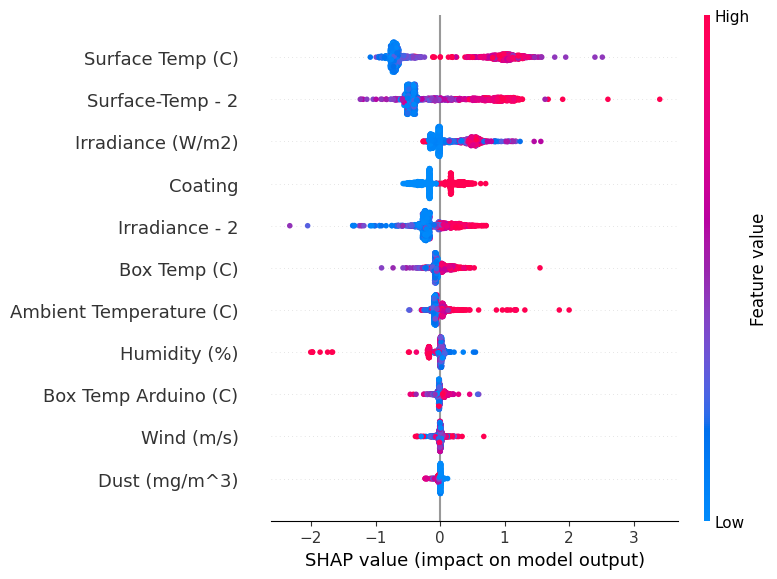

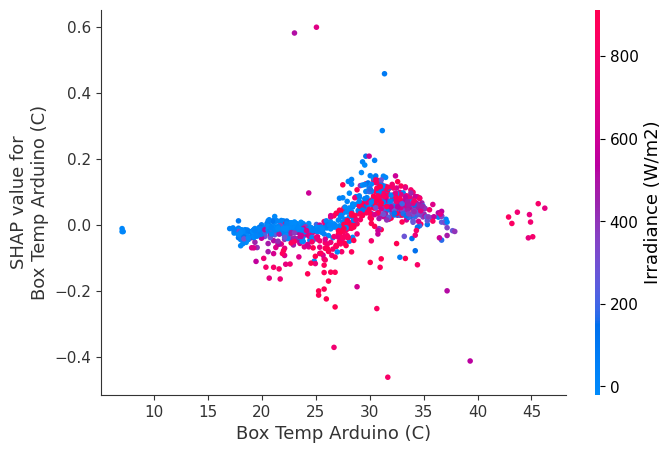

In [ ]:
##!pip install lime
##!pip install shap


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lime
import lime.lime_tabular
import shap

# Load the dataset
##data = pd.read_csv('/content/drive/MyDrive/F1.xlsx')
file_path = '/content/drive/MyDrive/F1.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Define the feature columns and the target column
features = data.columns.drop('Max Pow - 2')
target = 'Max Pow - 2'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2 score: {r2}")

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features,
    class_names=[target],
    mode='regression'
)

i = 0  # Index of the test instance to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=model.predict
)
exp.show_in_notebook(show_table=True)

# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=features)

# SHAP dependence plot for a specific feature
shap.dependence_plot("Box Temp Arduino (C)", shap_values, X_test)


Ridge Regression accuracy: 0.929694374126184
SVR accuracy: 0.9417407649393531
Decision Tree Regression accuracy: 0.9012695333976446
Random Forest Regression accuracy: 0.92873543064738
Linear Regression accuracy: 0.929686665381646
XGBoost accuracy: 0.9268155184770556
Gradient Boosting accuracy: 0.9529845165783173
Extra Trees Regressor accuracy: 0.9466682457762263
ANN Model accuracy: 0.9266403145164926
Top 3 models: ('Gradient Boosting', 'Extra Trees Regressor', 'SVR')
MAE: 0.20125577391590432
MSE: 0.223335182136847
R^2 score: 0.9480920771757905


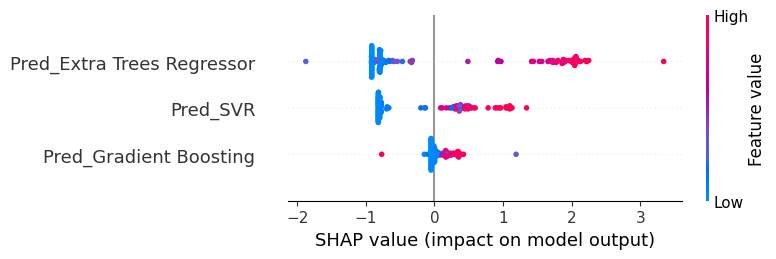

ValueError: Could not find feature named: Pred_Gradient Boosting

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import lime
import lime.lime_tabular
import shap

# Load the dataset
##data = pd.read_csv('/content/drive/MyDrive/F1.xlsx')
file_path = '/content/drive/MyDrive/F1.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Define the feature columns and the target column
features = data.columns.drop('Max Pow - 2')
target = 'Max Pow - 2'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.02, random_state=42)

# Ensure data is scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models with hyperparameter grids
base_models = {
    "Ridge Regression": (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    "SVR": (SVR(), {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.5]}),
    "Decision Tree Regression": (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    "Random Forest Regression": (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    "Linear Regression": (LinearRegression(), {}),
    "XGBoost": (XGBRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}),
    "Extra Trees Regressor": (ExtraTreesRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    "ANN Model": (MLPRegressor(max_iter=1000), {'hidden_layer_sizes': [(100,), (100, 50)], 'alpha': [0.0001, 0.001, 0.01]})
}

# Tune base models and collect the best ones
tuned_base_models = []
for name, (model, param_grid) in base_models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    tuned_base_models.append((name, best_model))
    score = best_model.score(X_test_scaled, y_test)
    print(f"{name} accuracy: {score}")

# Select the top 3 highest accuracy models
top_models = sorted(tuned_base_models, key=lambda item: item[1].score(X_test_scaled, y_test), reverse=True)[:3]
top_model_names, top_models = zip(*top_models)

# Print the names of the top 3 models
print("Top 3 models:", top_model_names)

# Create a new training set with the predictions of the top models as features using cross-validation
stacked_features_train = np.column_stack([
    cross_val_predict(model, X_train_scaled, y_train, cv=3) for model in top_models
])
y_train_stacked = y_train

# Train the meta model (XGBoost) with hyperparameter tuning
meta_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(meta_model, param_grid, cv=3, scoring='r2')
grid_search.fit(stacked_features_train, y_train_stacked)

best_meta_model = grid_search.best_estimator_

# Create a new test set with the predictions of the top models as features
stacked_features_test = np.column_stack([model.predict(X_test_scaled) for model in top_models])
y_test_stacked = y_test

# Predict with the meta model on the stacked test set
y_pred_stacked = best_meta_model.predict(stacked_features_test)

# Evaluate the meta model on the stacked test set
meta_model_score = best_meta_model.score(stacked_features_test, y_test_stacked)
mae = mean_absolute_error(y_test_stacked, y_pred_stacked)
mse = mean_squared_error(y_test_stacked, y_pred_stacked)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2 score: {meta_model_score}")

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=stacked_features_train,
    feature_names=[f'Pred_{name}' for name in top_model_names],
    class_names=[target],
    mode='regression'
)

i = 0  # Index of the test instance to explain
exp = explainer.explain_instance(
    data_row=stacked_features_test[i],
    predict_fn=best_meta_model.predict
)
exp.show_in_notebook(show_table=True)

# SHAP
explainer = shap.TreeExplainer(best_meta_model)
shap_values = explainer.shap_values(stacked_features_test)

# SHAP summary plot
shap.summary_plot(shap_values, stacked_features_test, feature_names=[f'Pred_{name}' for name in top_model_names])

# SHAP dependence plot for a specific feature
shap.dependence_plot(f'Pred_{top_model_names[0]}', shap_values, stacked_features_test)
